<a href="https://colab.research.google.com/github/densivanov/data_analytics_projects/blob/main/uber_analysis/uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Getting data

In [2]:
df = pd.read_csv("/content/uber_data.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


**Now, based on this table, I will build a data model diagram, with which it will be easy to navigate through the table itself. The screenshot can be seen below**

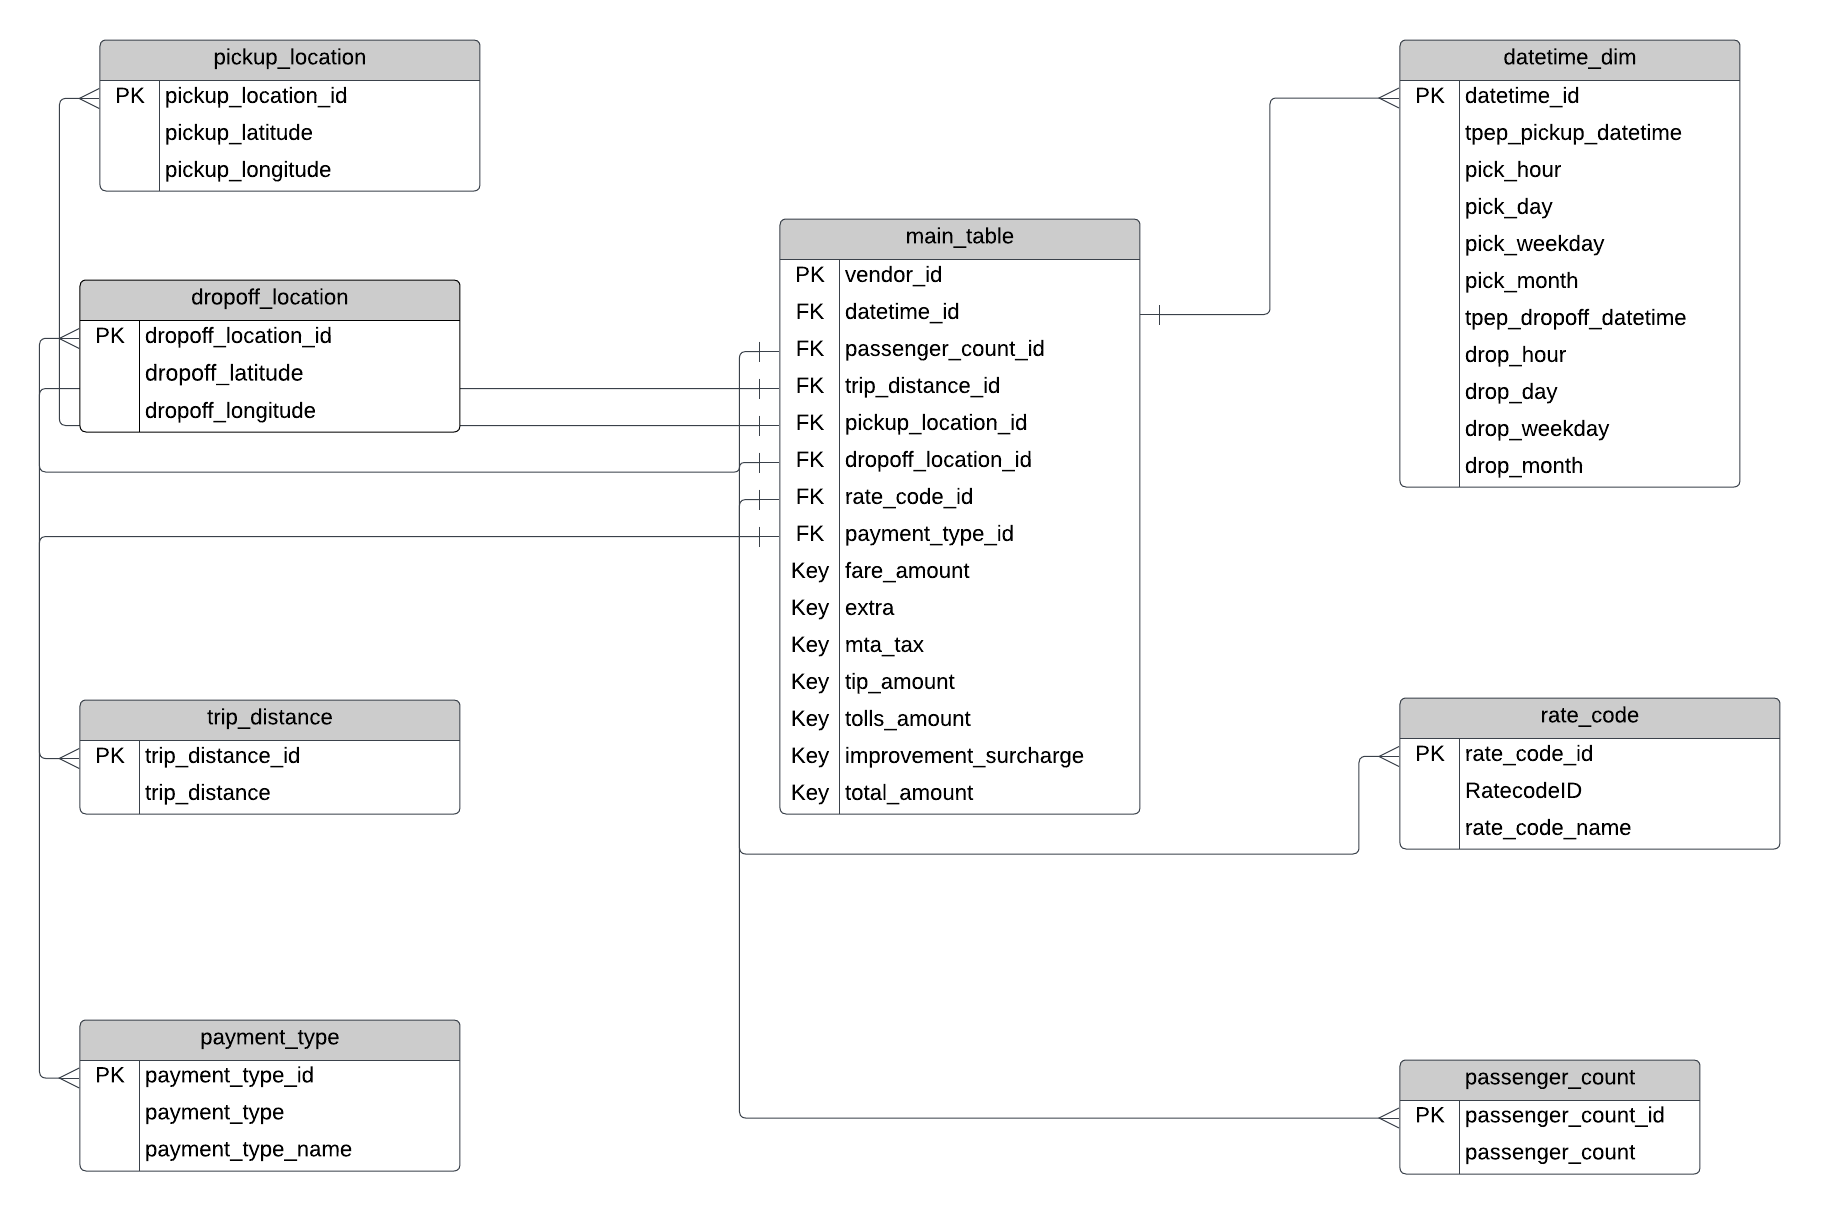

# Data cleaning and preparing

In [4]:
def summary(df):
  '''

  The function goes through the entire dataset and finds the corresponding values:

  - missing values
  - % of the missing values for each column
  - unique values in the column
  - duplicates in each column
  - min / max values
  - 1st,2nd,3rd values in each column
  
  '''
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ 

In [5]:
summary(df)

data shape: (100000, 19)


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
VendorID,int64,0,0.0,2,100000,1.0,2.0,1,1,2
tpep_pickup_datetime,object,0,0.0,38332,100000,NaN,NaN,2016-03-01 00:00:00,2016-03-01 00:00:00,2016-03-01 00:00:00
tpep_dropoff_datetime,object,0,0.0,39981,100000,NaN,NaN,2016-03-01 00:07:55,2016-03-01 00:11:06,2016-03-01 00:31:06
passenger_count,int64,0,0.0,7,100000,0.0,6.0,1,1,2
trip_distance,float64,0,0.0,2303,100000,0.0,184.4,2.5,2.9,19.98
pickup_longitude,float64,0,0.0,13057,100000,-121.933327,0.0,-73.976746,-73.983482,-73.782021
pickup_latitude,float64,0,0.0,25082,100000,0.0,41.204548,40.765152,40.767925,40.64481
RatecodeID,int64,0,0.0,6,100000,1.0,6.0,1,1,1
store_and_fwd_flag,object,0,0.0,2,100000,NaN,NaN,N,N,N
dropoff_longitude,float64,0,0.0,15850,100000,-121.933327,0.0,-74.004265,-74.005943,-73.974541


**As we might see we have a dataset with no missing values. So let's move on to the data preparing**

In [6]:
#converting columns into datatime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**Now, I am going to drop all duplicates in the dataset**

In [7]:
df = df.drop_duplicates().reset_index(drop = True)
#adding a new column
df['trip_id'] = df.index

#### Creating tables from a model

**Table "datetime_dim"**


In [8]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index


datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


**Table "passenger_count"**

In [9]:
#We select the necessary columns for our table
passenger_count = df[['passenger_count']].reset_index(drop=True)
passenger_count['passenger_count_id'] = passenger_count.index
passenger_count = passenger_count[['passenger_count_id','passenger_count']]



In [10]:
passenger_count.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


**Table "trip_distance"**

In [11]:
trip_distance = df[['trip_distance']].reset_index(drop=True)
trip_distance['trip_distance_id'] = trip_distance.index
trip_distance = trip_distance[['trip_distance_id','trip_distance']]

In [12]:
trip_distance.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


**Table "rate_code"**

In [13]:
#Creating a dictionary for values
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code= df[['RatecodeID']].reset_index(drop=True)
rate_code['rate_code_id'] = rate_code.index
rate_code['rate_code_name'] = rate_code['RatecodeID'].map(rate_code_type)
rate_code = rate_code[['rate_code_id','RatecodeID','rate_code_name']]


In [14]:
rate_code.sample(5)

,rate_code_id,RatecodeID,rate_code_name
6300,6300,1,Standard rate
77110,77110,1,Standard rate
19880,19880,1,Standard rate
50097,50097,1,Standard rate
2537,2537,1,Standard rate


**Table "payment_type"**

In [15]:
#dictionary for values
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type = df[['payment_type']].reset_index(drop=True)
payment_type['payment_type_id'] = payment_type.index
payment_type['payment_type_name'] = payment_type['payment_type'].map(payment_type_name)
payment_type = payment_type[['payment_type_id','payment_type','payment_type_name']]

In [16]:
payment_type.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


**Table "pickup_location"**

In [17]:
pickup_location = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location['pickup_location_id'] = pickup_location.index
pickup_location = pickup_location[['pickup_location_id','pickup_latitude','pickup_longitude']] 

In [18]:
pickup_location.head()

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741


**Table "dropoff_location"**

In [19]:
dropoff_location = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location['dropoff_location_id'] = dropoff_location.index
dropoff_location = dropoff_location[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [20]:
dropoff_location.head()

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170


**At the end we create our main table**

In [21]:
#Let's create a table by merging our past tables
main_table = df.merge(passenger_count, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [22]:
main_table.head(5)

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80


#Saving the file

In [23]:
main_table.to_csv("main.csv")